Blabla sur ce quon va faire, sur le probleme, les infos des données 
Mise en place de l'environnement de travail et des données.
Examination de la structure des données

In [3]:
# Importation de la bibliothèque NumPy pour la gestion de tableaux et les calculs numériques
# Importation de la bibliothèque Dash pour créer des applications web interactives
# Importation de la bibliothèque Plotly Express pour créer des visualisations interactives simplifiées (graphiques à barres, des nuages de points, ...)
# Importation de pandas pour la manipulation de données, qui permet de lire, traiter et analyser des données sous forme de tableaux structurés 
# Importation de la bibliothèque matplotlib.pyplot pour créer des graphiques
# Importation de la bibliothèque seaborn pour des visualisations statistiques améliorées
import numpy as np
import dash
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation de composants spécifiques de Dash :
# - dcc (Dash Core Components) : pour créer des graphiques, des menus déroulants, des sliders, ...
# - html : pour structurer la mise en page avec des éléments HTML
# - Input et Output : pour gérer les interactions et la réactivité entre les composants
# Importation de la bibliothèque preprocessing de scikit-learn, qui contient des outils pour la transformation des données.
from dash import dcc, html, Input, Output
from sklearn import preprocessing
# Initialisation de l'application
app = dash.Dash(__name__)


In [4]:
# Lecture des données depuis le fichier CSV
df = pd.read_csv('healthinsurance.csv')
print(df)

        age     sex  weight   bmi hereditary_diseases  no_of_dependents  \
0      60.0    male      64  24.3           NoDisease                 1   
1      49.0  female      75  22.6           NoDisease                 1   
2      32.0  female      64  17.8            Epilepsy                 2   
3      61.0  female      53  36.4           NoDisease                 1   
4      19.0  female      50  20.6           NoDisease                 0   
...     ...     ...     ...   ...                 ...               ...   
14995  39.0    male      49  28.3           NoDisease                 1   
14996  39.0    male      74  29.6           NoDisease                 4   
14997  20.0    male      62  33.3           NoDisease                 0   
14998  52.0    male      88  36.7           NoDisease                 0   
14999  52.0    male      57  26.4           NoDisease                 3   

       smoker         city  bloodpressure  diabetes  regular_ex  \
0           0      NewYork      

## I. Structure des données et nettoyage

### 1. Vérification de la structure :
- Le nombre de lignes et de colonnes sera examiné.
- Le type de chaque colonne (numérique, texte, etc.) sera déterminé.
- Les valeurs manquantes seront identifiées.
- Les statistiques de base (moyenne, médiane, min, max, etc.) pour les colonnes numériques seront calculées.

In [5]:
# Afficher les premières lignes du DataFrame pour un aperçu rapide des données
# Afficher des informations générales sur le DataFrame (nombre de lignes, types de données, valeurs manquantes, ...)
# Afficher des statistiques descriptives des colonnes numériques (moyenne, écart-type, min, max, ...)

print(f"Affichage des premières lignes : {df.head()}") 
print(f"Affichages des informations générales {df.info()}")
print(f"Affichages des statistiques descriptives {df.describe()}")

print(f"Le nombre de colonnes est de {df.shape[0]}.")
print(f"Le nombre de lignes est de {df.shape[1]}.")

Affichage des premières lignes :     age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  
<class 'pandas.core.frame.DataFrame'

### 2. Présence de valeurs manquantes :
- La présence de valeurs manquantes ou nulles sera vérifiée dans le DataFrame.
- Si des valeurs manquantes sont détectées, elles seront soit imputées (remplacées), soit supprimées, en fonction de l'importance de la colonne.

In [6]:
# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum()) 

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


#### Valeurs manquantes dans les colonnes "age" et "bmi"

Il y a **396 valeurs nulles** dans la colonne **"age"** et **956 valeurs nulles** dans la colonne **"bmi"**.

#### Vérification de l'asymétrie des données pour décider de l'imputation des colonnes contenant des valeurs manquantes

L'asymétrie mesure la symétrie d'une distribution de données. En d'autres termes, elle indique si les valeurs d'une distribution sont équilibrées autour de la moyenne ou si elles sont décalées vers une extrémité.

- **Asymétrie nulle** : La distribution est symétrique (comme une distribution normale).
- **Asymétrie positive** : La queue de la distribution s'étend davantage vers les valeurs élevées, indiquant que la majorité des valeurs sont inférieures à la moyenne.
- **Asymétrie négative** : La queue de la distribution s'étend davantage vers les valeurs faibles, ce qui signifie que la majorité des valeurs sont supérieures à la moyenne.

**Choix de la méthode d'imputation** :
- **Imputation basée sur la moyenne** : Si les données présentent une asymétrie positive ou négative, l'utilisation de la moyenne pour imputer les valeurs manquantes peut entraîner des biais. Par exemple, pour une distribution asymétrique positive, la moyenne sera plus élevée que la médiane, ce qui peut fausser l'imputation.
- **Imputation basée sur la médiane** : La médiane est moins influencée par les valeurs extrêmes et peut être une meilleure option pour les distributions asymétriques. Si les données sont très asymétriques, l'imputation de la médiane peut donner des résultats plus représentatifs.

In [7]:
# Liste des colonnes à transformer dans le DataFrame
columns = ['hereditary_diseases', 'job_title', 'city', 'sex'] 

# Boucle à travers chaque nom de colonne dans la liste "columns"
for X in columns:
    # Création d'un encodeur de labels pour la colonne actuelle.
    # La fonction exec crée dynamiquement une variable avec le nom "le_X" où X est le nom de la colonne.
    exec(f'le_{X} = preprocessing.LabelEncoder()')  # crée un encodeur de labels avec le nom "le_X"

    # Application de l'encodeur de labels à la colonne actuelle.
    # Le résultat est assigné à la colonne correspondante du DataFrame.
    # Cela remplace les valeurs de la colonne par leurs indices numériques respectifs.
    exec(f'df.{X} = le_{X}.fit_transform(df.{X})')  # exécute fit_transform pour la colonne X avec l'encodeur "le_X"

# Affichage des premières lignes du DataFrame pour voir les résultats transformés
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


Homme = 0
Femme = 1
Pas de maladie = 8
Epilepsy = 4

In [8]:
# Vérification de l'asymétrie des colonnes numériques
df.skew()  

age                    0.005577
sex                    0.040546
weight                 0.286034
bmi                    0.375259
hereditary_diseases   -4.724370
no_of_dependents       0.928935
smoker                 1.514812
city                  -0.063712
bloodpressure         -1.963879
diabetes              -1.331037
regular_ex             1.323201
job_title             -0.198130
claim                  1.497829
dtype: float64

Comme les données des colonnes âge et IMC affichent une asymétrie se situant entre -0,5 et +0,5, nous pouvons conclure qu'elles sont relativement symétriques. Ainsi, nous allons imputer les valeurs nulles en utilisant la moyenne.

In [9]:
# Remplir les valeurs manquantes
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Vérifier la forme après remplissage
print("Shape après remplissage :", df.shape)

#Pas de perte de données

Shape après remplissage : (15000, 13)


### 3. Recherche de doublons :

In [10]:
# Trouver les doublons
print(df.duplicated().sum())  

# Affiche les doublons
df[df.duplicated()]
df = df.drop_duplicates()
# Supprimer les doublons si nécessaire
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())  
print("Shape après remplissage :", df.shape)

1096
0
Shape après remplissage : (13904, 13)


## II. Analyse : Visualisation des données

Dans cette section, nous allons examiner les différentes distributions et relations au sein des données. La visualisation des données nous permettra d'obtenir des informations précieuses pour mieux comprendre notre jeu de données.

### 1. Distribution des réclamations (CLAIMS)

Nous commencerons par analyser la distribution des réclamations, qui est notre variable cible. Cela nous aidera à comprendre comment les réclamations sont réparties et à identifier d'éventuelles anomalies ou tendances.

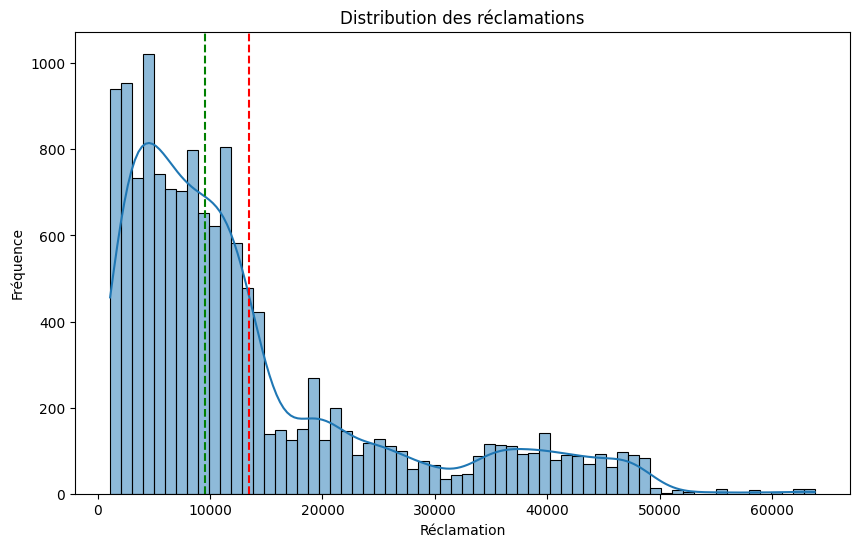

Moyenne des réclamations : 13431.813744246261
Asymétrie des réclamations : 1.489221351406612
Médiane : 9567.0


In [11]:
plt.figure(figsize=(10, 6))

# Création d'un histogramme de la distribution des réclamations avec une estimation de la densité (KDE)
sns.histplot(x='claim', data=df, kde=True)

# Ajout d'une ligne verticale représentant la moyenne des réclamations et une pour la médiane des réclamations
plt.axvline(df.claim.mean(), color='r', linestyle='--', label='Moyenne')
plt.axvline(df.claim.median(), color='g', linestyle='--', label='Médiane')

# Légende
plt.title('Distribution des réclamations')
plt.xlabel('Réclamation')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

# Calcul et affichage de la moyenne et de l'asymétrie des réclamations
mean_claim = df['claim'].mean()  # Moyenne des réclamations
skewness_claim = df['claim'].skew()  # Asymétrie des réclamations

# Impression des résultats
print(f"Moyenne des réclamations : {mean_claim}")
print(f"Asymétrie des réclamations : {skewness_claim}")
print(f'Médiane : {df["claim"].median()}')


En moyenne, les réclamations des clients, d'après la colonne claim du DataFrame, s'élèvent à environ 13 431 dollars. Cependant, un certain nombre de clients déclarent des montants supérieurs à 60 000 dollars, ce qui représente des valeurs aberrantes. Ces valeurs provoquent une asymétrie à droite de la distribution des réclamations. Cette observation a été confirmée par un coefficient d'asymétrie (skewness) de 1,48, obtenu en analysant la distribution à l'aide d'un histogramme enrichi d'une estimation de la densité (KDE).(Moyenne > Médiane et asymétrie positive montrent que la distribution est influencée par des valeurs extrêmes élevées.)

### 2. Distribution de l'âge (AGE)

Ensuite, nous examinerons la distribution de l'âge. Cela nous permettra de voir la répartition des âges au sein de notre population et d'identifier des groupes d'âge spécifiques qui pourraient influencer les réclamations.

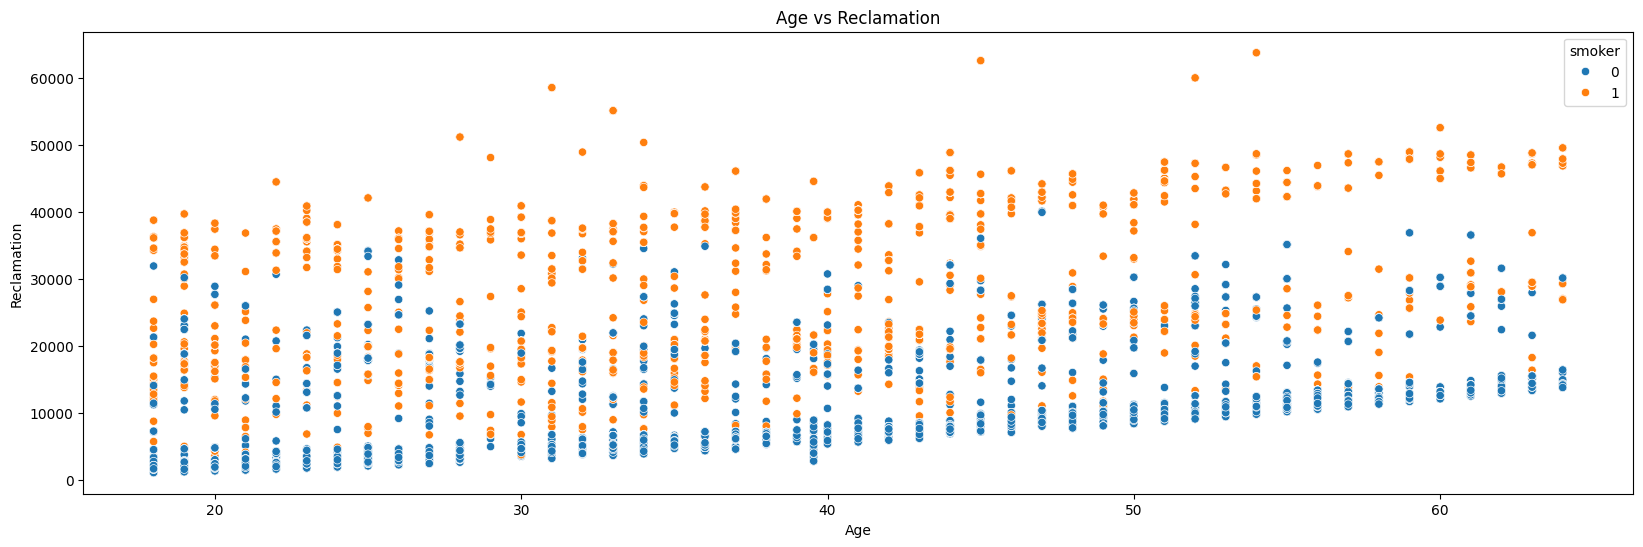

Asymétrie: 0.006241188212225505
Moyenne: 40
Médiane: 40.0
Age minimum: 18.0
Age maximum: 64.0
Le coefficient de corrélation entre l'âge et les réclamations est de : 0.30


In [12]:
plt.figure(figsize=(20, 6))

# Création d'un nuage de points (scatter plot) avec la bibliothèque Seaborn
# - x='age' : l'âge est représenté sur l'axe des abscisses
# - y='Reclamation' : le montant des réclamations est représenté sur l'axe des ordonnées
# - data=df : le DataFrame utilisé est df
# - hue='smoker' : les points sont colorés en fonction de la colonne 'smoker' (fumeurs/non-fumeurs), permettant de différencier ces deux groupes
sns.scatterplot(x='age', y='claim', data=df, hue='smoker')

# Légende
plt.title('Age vs Reclamation')
plt.xlabel('Age')
plt.ylabel('Reclamation')

# Affichage du graphique
plt.show()

# Affichage des valeurs moyenne, médiane, ...
print(f'Asymétrie: {df["age"].skew()}')
print(f'Moyenne: {(df["age"].mean()):.0f}')
print(f'Médiane: {df["age"].median()}')
print(f'Age minimum: {df["age"].min()}')
print(f'Age maximum: {df["age"].max()}')

# Calculer la corrélation entre l'âge et les réclamations
correlation = df['age'].corr(df['claim'])
print(f'Le coefficient de corrélation entre l\'âge et les réclamations est de : {correlation:.2f}')

L'analyse des données relatives à l'âge révèle une distribution équilibrée et symétrique. L'asymétrie, qui est de 0,006, est pratiquement nulle, ce qui indique une répartition homogène des âges autour de la moyenne. La moyenne et la médiane, toutes deux établies à 40 ans, signifient que la moitié des clients ont moins de 40 ans, tandis que l'autre moitié en a plus. L'âge des clients varie entre 18 et 64 ans, ce qui témoigne d'une large diversité d'âges. En somme, la distribution de l'âge est bien centrée, sans décalage significatif vers les valeurs extrêmes.

En examinant le nuage de points, on constate une corrélation positive modérée de 0,3 entre l'âge et les réclamations : à mesure que l'âge du client augmente, le montant de ses réclamations tend également à augmenter. De plus, il est évident que les réclamations des fumeurs sont nettement plus élevées que celles des non-fumeurs, suggérant que le statut de fumeur pourrait jouer un rôle important dans les montants des réclamations.

### 3. Distribution du sexe (GENDER)

La visualisation de la distribution du sexe nous aidera à comprendre la répartition des hommes et des femmes dans notre jeu de données, ce qui peut avoir un impact sur les réclamations et les résultats d'analyse.

sex
0    7091
1    6813
Name: count, dtype: int64


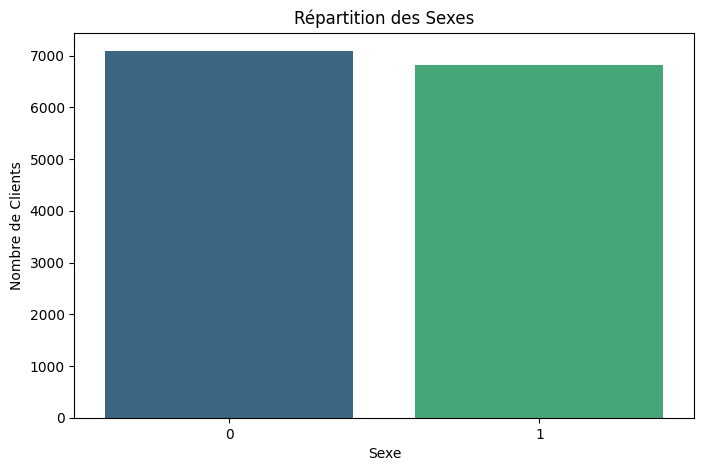

In [13]:
# Compter le nombre d'hommes et de femmes
gender_distribution = df['sex'].value_counts()

# Affichage de la répartition
print(gender_distribution)

# Création d'un graphique à barres
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values, hue=gender_distribution.index, palette='viridis', legend=False)
plt.title('Répartition des Sexes')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Clients')
plt.show()

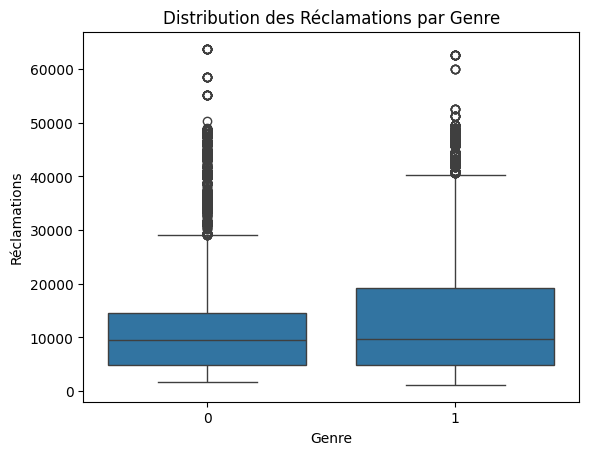

In [31]:
# Création d'un boxplot pour visualiser la distribution des réclamations (claim) en fonction du genre (sex)
sns.boxplot(x='sex', y='claim', data=df)

# Légende
plt.title('Distribution des Réclamations par Genre')
plt.xlabel('Genre')
plt.ylabel('Réclamations')

# Affichage du graphique
plt.show()


In [35]:
# Calcul de la moyenne des réclamations par genre et par statut de fumeur
moyenne_reclamations_par_genre_et_fumeur = df.groupby(['sex', 'smoker'])['claim'].mean().reset_index()

# Afficher les résultats
print(moyenne_reclamations_par_genre_et_fumeur)

   sex  smoker         claim
0    0       0   8994.773808
1    0       1  30829.400738
2    1       0   8465.285006
3    1       1  33088.837046


In [38]:
# Compter le nombre de fumeurs par genre
fumeur_par_genre = df.groupby(['sex', 'smoker']).size().unstack()

# Affichage du résultat
print(fumeur_par_genre)

smoker     0     1
sex               
0       5872  1219
1       5242  1571


Le nombre de clients masculins et féminins est relativement équilibré, avec 6813 hommes et 7091 femmes. Cependant, une analyse plus approfondie des coûts de réclamation révèle une différence significative. La moyenne des réclamations pour les clients masculins s'élève à environ 14 143 dollars, tandis que celle des clientes féminines est d'environ 12 748 dollars. Cette disparité pourrait s'expliquer par une proportion plus élevée de fumeurs parmi les hommes comparativement aux femmes.

En effet, les données montrent que les hommes fumeurs ont des réclamations moyennes de 33 088,84 dollars, contre 30 829,40 dollars pour les femmes fumeuses. De plus, il convient de noter qu'il y a un nombre considérable de fumeurs parmi les clients masculins, ce qui accentue l'impact du tabagisme sur le montant des réclamations. Cela indique une tendance où les hommes, en raison de leur statut de fumeur, tendent à avoir des coûts de réclamation plus élevés par rapport aux femmes.

### 3. Distribution de l'IMC (BMI)

Nous analyserons également la distribution de l'indice de masse corporelle (IMC) pour déterminer comment les différentes catégories de poids sont représentées et si cela pourrait avoir une incidence sur les réclamations.

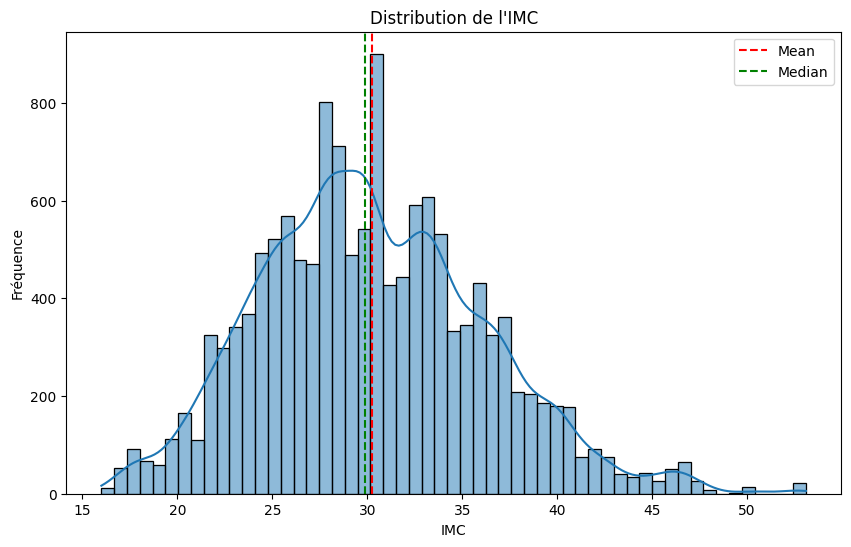

In [46]:
plt.figure(figsize=(10, 6))

# Création d'un histogramme de la distribution de l'IMC avec une estimation de la densité (KDE)
sns.histplot(x='bmi', data=df, kde=True)

# Ajout d'une ligne verticale pour représenter la moyenne et la médiane de l'IMC
plt.axvline(df.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(df.bmi.median(), color='g', linestyle='--', label='Median')

# Légende
plt.title('Distribution de l\'IMC')
plt.xlabel('IMC')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.legend()
plt.show()

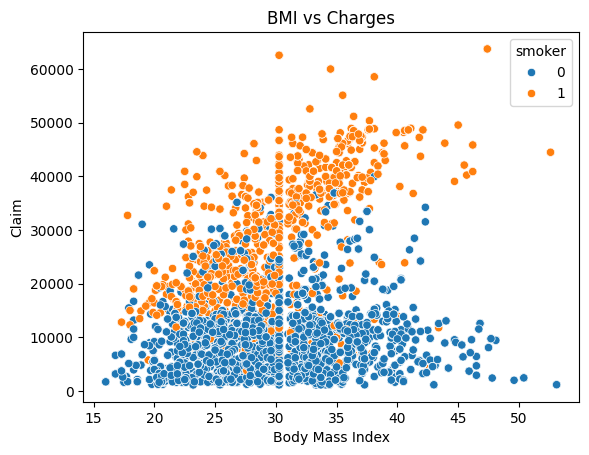

Skewness: 0.390556118762522
Mean: 30.273024873802015
Median: 29.9


In [44]:
sns.scatterplot(x='bmi', y='claim', data=df, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {df["bmi"].skew()}')
print(f'Mean: {(df["bmi"].mean())}')
print(f'Median: {df["bmi"].median()}')

L'analyse des données révèle que l'indice de masse corporelle (IMC) moyen de la clientèle se situe approximativement à 30 kg/m². La distribution de l'IMC présente une courbe gaussienne, avec une occurrence marginale de valeurs atypiques, permettant ainsi de les considérer comme statistiquement non significatives.
L'examen du diagramme de dispersion met en évidence une corrélation positive faible entre l'IMC et les montants des réclamations. Cette observation suggère que, pour la population non-fumeuse de la clientèle, une augmentation de l'IMC n'est pas associée à une hausse substantielle des réclamations.
En revanche, au sein des clients fumeurs, on constate une tendance différente : un IMC plus élevé est corrélé à des montants de réclamations supérieurs.
Ces résultats soulignent l'importance de considérer l'interaction entre le statut tabagique et l'IMC dans l'évaluation des risques et la gestion des réclamations.

### 4. Matrice de corrélation

Enfin, nous créerons une matrice de corrélation pour visualiser les relations entre les caractéristiques numériques. Cela nous permettra d'identifier les variables qui sont fortement corrélées entre elles, ce qui pourrait influencer notre modèle d'apprentissage automatique.

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()
